In [3]:
import pandas as pd
import numpy as np
activities = ['idles', 'jumping jack', 'push-up', 'running', 'Sit-ups', 'walking']
file_suffix = ['', ' 2', ' 3']
data = []
#read all files in 5 second intervals
#you will need to rename a file, read error message
for i in range(len(activities)):
    for s in file_suffix:
        if activities[i] == 'idles' and s != '':
            pass
        else:
            body_acc = pd.read_csv('data/' + activities[i] + '/body_acc/text' + s + '.txt')
            body_gyro = pd.read_csv('data/' + activities[i] + '/body_gyro/text' + s + '.txt')
            body_mag = pd.read_csv('data/' + activities[i] + '/body_mag/text' + s + '.txt')
            hand_acc =pd.read_csv('data/' + activities[i] + '/hand_acc/text' + s + '.txt')
            hand_gyro = pd.read_csv('data/' + activities[i] + '/hand_gyro/text' + s + '.txt')
            hand_mag = pd.read_csv('data/' + activities[i] + '/hand_mag/text' + s + '.txt')
            for j in range(11):
                temp = dict()
                temp['bax_mean'] = np.mean(body_acc.iloc[j*50:(j+1)*50, 1]) #bax = body accelerometer x-axis
                temp['bay_mean'] = np.mean(body_acc.iloc[j*50:(j+1)*50, 2])
                temp['baz_mean'] = np.mean(body_acc.iloc[j*50:(j+1)*50, 3])
                temp['bgx_mean'] = np.mean(body_gyro.iloc[j*50:(j+1)*50, 1])
                temp['bgy_mean'] = np.mean(body_gyro.iloc[j*50:(j+1)*50, 2])
                temp['bgz_mean'] = np.mean(body_gyro.iloc[j*50:(j+1)*50, 3])
                temp['bmx_mean'] = np.mean(body_mag.iloc[j*50:(j+1)*50, 1])
                temp['bmy_mean'] = np.mean(body_mag.iloc[j*50:(j+1)*50, 2])
                temp['bmz_mean'] = np.mean(body_mag.iloc[j*50:(j+1)*50, 3])
                temp['hax_mean'] = np.mean(hand_acc.iloc[j*50:(j+1)*50, 1])
                temp['hay_mean'] = np.mean(hand_acc.iloc[j*50:(j+1)*50, 2])
                temp['haz_mean'] = np.mean(hand_acc.iloc[j*50:(j+1)*50, 3])
                temp['hgx_mean'] = np.mean(hand_gyro.iloc[j*50:(j+1)*50, 1])
                temp['hgy_mean'] = np.mean(hand_gyro.iloc[j*50:(j+1)*50, 2])
                temp['hgz_mean'] = np.mean(hand_gyro.iloc[j*50:(j+1)*50, 3])
                temp['hmx_mean'] = np.mean(hand_mag.iloc[j*50:(j+1)*50, 1])
                temp['hmy_mean'] = np.mean(hand_mag.iloc[j*50:(j+1)*50, 2])
                temp['hmz_mean'] = np.mean(hand_mag.iloc[j*50:(j+1)*50, 3])
                temp['activity'] = i
                data.append(temp)
                
                
print(data)

[{'bax_mean': -0.97, 'bay_mean': 0.07400000000000001, 'baz_mean': 0.102, 'bgx_mean': 0.188, 'bgy_mean': 1.016, 'bgz_mean': 2.0540000000000003, 'bmx_mean': -2.9060000000000006, 'bmy_mean': -6.262, 'bmz_mean': -4.294, 'hax_mean': -0.916, 'hay_mean': 3.216, 'haz_mean': -1.3720000000000006, 'hgx_mean': -4.912, 'hgy_mean': 2.8379999999999996, 'hgz_mean': -6.226000000000002, 'hmx_mean': -4.912, 'hmy_mean': 2.8379999999999996, 'hmz_mean': -6.226000000000002, 'activity': 0}, {'bax_mean': -1.0, 'bay_mean': 0.09999999999999998, 'baz_mean': 0.19599999999999995, 'bgx_mean': 0.34600000000000003, 'bgy_mean': 0.9099999999999998, 'bgz_mean': -0.31200000000000006, 'bmx_mean': -14.24, 'bmy_mean': 18.202, 'bmz_mean': -13.216000000000001, 'hax_mean': -0.602, 'hay_mean': 2.664, 'haz_mean': 0.06600000000000003, 'hgx_mean': -0.8519999999999998, 'hgy_mean': -3.4020000000000006, 'hgz_mean': -2.242, 'hmx_mean': -0.8519999999999998, 'hmy_mean': -3.4020000000000006, 'hmz_mean': -2.242, 'activity': 0}, {'bax_mean'

Train Accuracy: 1.0 
Test Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


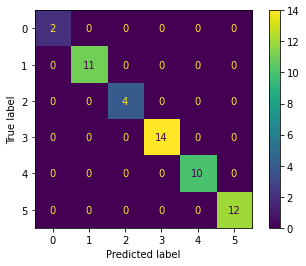

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.multiclass import OneVsOneClassifier
import joblib

#Acuracy is 100% with hand + body sensor data, however sometimes there are wrong classifications for idle
#Before adding idle to the model it was always 100%
#Maybe we need more data for idle, also the data would likely be very different when standing/sitting etc.

df = pd.DataFrame(data, columns=['bax_mean', 'bay_mean', 'baz_mean', 'bgx_mean', 'bgy_mean', 'bgz_mean', 
                                 'bmx_mean', 'bmy_mean', 'bmz_mean', 'hax_mean', 'hay_mean', 'haz_mean', 
                                 'hgx_mean', 'hgy_mean', 'hgz_mean', 'hmx_mean', 'hmy_mean', 'hmz_mean', 'activity'])

X = df[['bax_mean', 'bay_mean', 'baz_mean', 'bgx_mean', 'bgy_mean', 'bgz_mean', 
        'bmx_mean', 'bmy_mean', 'bmz_mean', 'hax_mean', 'hay_mean', 'haz_mean', 
        'hgx_mean', 'hgy_mean', 'hgz_mean', 'hmx_mean', 'hmy_mean', 'hmz_mean']]

scaler= StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
Y = df['activity']
(X_train,X_test,Y_train,Y_test) = train_test_split(X, Y, test_size=0.3)

clf = OneVsOneClassifier(LinearSVC(random_state=0))
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

train_acc = clf.score(X_train, Y_train)
test_acc = clf.score(X_test, Y_test)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')

print("Train Accuracy:", train_acc, "\nTest Accuracy:", test_acc, "\nPrecision:", precision, "\nRecall:", recall)
joblib.dump(clf, "./random_forest.joblib")
joblib.dump(scaler, 'scaler_data.joblib')
plot_confusion_matrix(clf, X_test, Y_test)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.multiclass import OneVsOneClassifier
import joblib

#Acuracy is 100% with hand + body sensor data, however sometimes there are wrong classifications for idle
#Before adding idle to the model it was always 100%
#Maybe we need more data for idle, also the data would likely be very different when standing/sitting etc.

df = pd.DataFrame(data, columns=['bax_mean', 'bay_mean', 'baz_mean', 'bgx_mean', 'bgy_mean', 'bgz_mean', 
                                 'bmx_mean', 'bmy_mean', 'bmz_mean', 'hax_mean', 'hay_mean', 'haz_mean', 
                                 'hgx_mean', 'hgy_mean', 'hgz_mean', 'hmx_mean', 'hmy_mean', 'hmz_mean', 'activity'])

X = df[['bax_mean', 'bay_mean', 'baz_mean', 'bgx_mean', 'bgy_mean', 'bgz_mean', 
        'bmx_mean', 'bmy_mean', 'bmz_mean', 'hax_mean', 'hay_mean', 'haz_mean', 
        'hgx_mean', 'hgy_mean', 'hgz_mean', 'hmx_mean', 'hmy_mean', 'hmz_mean']]

scaler= StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
Y = df['activity']
(X_train,X_test,Y_train,Y_test) = train_test_split(X, Y, test_size=0.3)

clf = OneVsOneClassifier(LinearSVC(random_state=0))
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

train_acc = clf.score(X_train, Y_train)
test_acc = clf.score(X_test, Y_test)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')

print("Train Accuracy:", train_acc, "\nTest Accuracy:", test_acc, "\nPrecision:", precision, "\nRecall:", recall)
joblib.dump(clf, "./random_forest.joblib")
joblib.dump(scaler, 'scaler_data.joblib')
plot_confusion_matrix(clf, X_test, Y_test)
plt.show()

Train Accuracy: 0.926829268292683 
Test Accuracy: 0.9056603773584906 
Precision: 0.9169811320754717 
Recall: 0.9056603773584906


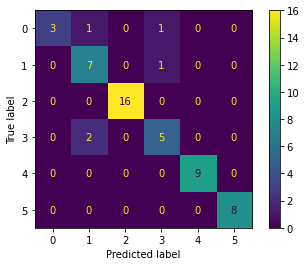

In [4]:
#Accuracy is not very high with only body sensor data

df = pd.DataFrame(data, columns=['bax_mean', 'bay_mean', 'baz_mean', 'bgx_mean', 'bgy_mean', 'bgz_mean', 
                                 'bmx_mean', 'bmy_mean', 'bmz_mean', 'activity'])

X = df[['bax_mean', 'bay_mean', 'baz_mean', 'bgx_mean', 'bgy_mean', 'bgz_mean', 
        'bmx_mean', 'bmy_mean', 'bmz_mean']]

scaler= StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
Y = df['activity']
(X_train,X_test,Y_train,Y_test) = train_test_split(X, Y, test_size=0.3)

clf = OneVsOneClassifier(LinearSVC(random_state=0))
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

train_acc = clf.score(X_train, Y_train)
test_acc = clf.score(X_test, Y_test)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')

print("Train Accuracy:", train_acc, "\nTest Accuracy:", test_acc, "\nPrecision:", precision, "\nRecall:", recall)
plot_confusion_matrix(clf, X_test, Y_test)
plt.show()



Train Accuracy: 1.0 
Test Accuracy: 0.9811320754716981 
Precision: 0.9838274932614555 
Recall: 0.9811320754716981


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


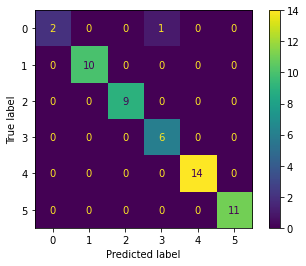

In [20]:
#Accuracy is very high with only hand sensor data, if you keep rerunning this occasionally you get 1 wrong classification (not idle)

df = pd.DataFrame(data, columns=['hax_mean', 'hay_mean', 'haz_mean', 'hgx_mean', 'hgy_mean', 'hgz_mean', 
                                 'hmx_mean', 'hmy_mean', 'hmz_mean', 'activity'])

X = df[['hax_mean', 'hay_mean', 'haz_mean', 'hgx_mean', 'hgy_mean', 'hgz_mean', 
        'hmx_mean', 'hmy_mean', 'hmz_mean']]

X = df[['hax_mean', 'hay_mean', 'haz_mean', 'hgx_mean', 'hgy_mean', 'hgz_mean', 
        'hmx_mean', 'hmy_mean', 'hmz_mean']]

# df['maga'] = np.sqrt(df['hax_mean']**2 + df['hay_mean']**2 + df['haz_mean']**2)
# df['magg'] = np.sqrt(df['hgx_mean']**2 + df['hgy_mean']**2 + df['hgz_mean']**2)
# df['magm'] = np.sqrt(df['hmx_mean']**2 + df['hmy_mean']**2 + df['hmz_mean']**2)
# X = df[['maga', 'magg','magm']]



scaler= StandardScaler()
scaler.fit(X.values)
X=scaler.transform(X.values)
Y = df['activity']

(X_train,X_test,Y_train,Y_test) = train_test_split(X, Y, test_size=0.3)

clf = OneVsOneClassifier(LinearSVC(random_state=0))
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

train_acc = clf.score(X_train, Y_train)
test_acc = clf.score(X_test, Y_test)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')

print("Train Accuracy:", train_acc, "\nTest Accuracy:", test_acc, "\nPrecision:", precision, "\nRecall:", recall)

joblib.dump(clf, "./random_forest.joblib")
joblib.dump(scaler, 'scaler_data.joblib')
plot_confusion_matrix(clf, X_test, Y_test)
plt.show()

In [190]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np

activities = ['jumping jack', 'push-up', 'running', 'Sit-ups', 'walking']
file_suffix = ['', ' 2', ' 3']

#peaks for every sensor type and axis

for i in range(len(activities)):
    for s in file_suffix:
        body_acc = pd.read_csv('data/' + activities[i] + '/body_acc/text' + s + '.txt')
        body_gyro = pd.read_csv('data/' + activities[i] + '/body_gyro/text' + s + '.txt')
        body_mag = pd.read_csv('data/' + activities[i] + '/body_mag/text' + s + '.txt')
        hand_acc =pd.read_csv('data/' + activities[i] + '/hand_acc/text' + s + '.txt')
        hand_gyro = pd.read_csv('data/' + activities[i] + '/hand_gyro/text' + s + '.txt')
        hand_mag = pd.read_csv('data/' + activities[i] + '/hand_mag/text' + s + '.txt')
        temp = dict()
        temp['bax'] = body_acc.iloc[:,1]
        temp['bay'] = body_acc.iloc[:,2]
        temp['baz'] = body_acc.iloc[:,3]
        temp['bgx'] = body_gyro.iloc[:,1]
        temp['bgy'] = body_gyro.iloc[:,2]
        temp['bgz'] = body_gyro.iloc[:,3]
        temp['bmx'] = body_mag.iloc[:,1]
        temp['bmy'] = body_mag.iloc[:,2]
        temp['bmz'] = body_mag.iloc[:,3]
        temp['hax'] = hand_acc.iloc[:,1]
        temp['hay'] = hand_acc.iloc[:,2]
        temp['haz'] = hand_acc.iloc[:,3]
        temp['hgx'] = hand_gyro.iloc[:,1]
        temp['hgy'] = hand_gyro.iloc[:,2]
        temp['hgz'] = hand_gyro.iloc[:,3]
        temp['hmx'] = hand_mag.iloc[:,1]
        temp['hmy'] = hand_mag.iloc[:,2]
        temp['hmz'] = hand_mag.iloc[:,3]
        for key, value in temp.items():
            peaks, _ = find_peaks(value, height=0)
            print(activities[i], s, key, len(peaks))

jumping jack  bax 0
jumping jack  bay 42
jumping jack  baz 58
jumping jack  bgx 100
jumping jack  bgy 106
jumping jack  bgz 102
jumping jack  bmx 4
jumping jack  bmy 0
jumping jack  bmz 0
jumping jack  hax 89
jumping jack  hay 74
jumping jack  haz 6
jumping jack  hgx 106
jumping jack  hgy 111
jumping jack  hgz 29
jumping jack  hmx 85
jumping jack  hmy 0
jumping jack  hmz 76
jumping jack  2 bax 0
jumping jack  2 bay 43
jumping jack  2 baz 63
jumping jack  2 bgx 87
jumping jack  2 bgy 103
jumping jack  2 bgz 90
jumping jack  2 bmx 73
jumping jack  2 bmy 0
jumping jack  2 bmz 0
jumping jack  2 hax 91
jumping jack  2 hay 58
jumping jack  2 haz 6
jumping jack  2 hgx 110
jumping jack  2 hgy 64
jumping jack  2 hgz 37
jumping jack  2 hmx 73
jumping jack  2 hmy 0
jumping jack  2 hmz 64
jumping jack  3 bax 0
jumping jack  3 bay 51
jumping jack  3 baz 71
jumping jack  3 bgx 97
jumping jack  3 bgy 106
jumping jack  3 bgz 97
jumping jack  3 bmx 0
jumping jack  3 bmy 0
jumping jack  3 bmz 52
jumping

37


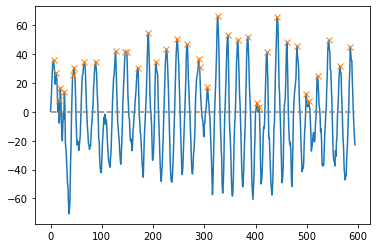

30


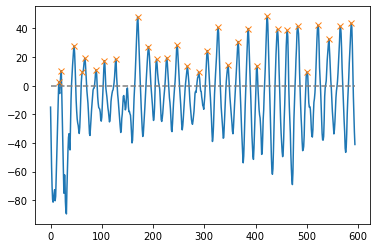

29


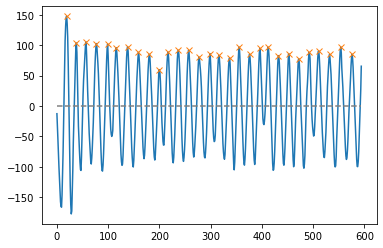

In [192]:
#Sit-ups, only looking at hand gyro

df = pd.read_csv('data/Sit-ups/hand_gyro/text.txt')
x = df.iloc[:,1]
y = df.iloc[:,2]
z = df.iloc[:,3]

peaks, _ = find_peaks(x, height=0)
print(len(peaks))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()
peaks, _ = find_peaks(y, height=0)
print(len(peaks))
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
plt.show()
peaks, _ = find_peaks(z, height=0)
print(len(peaks))
plt.plot(z)
plt.plot(peaks, z[peaks], "x")
plt.plot(np.zeros_like(z), "--", color="gray")
plt.show()

30


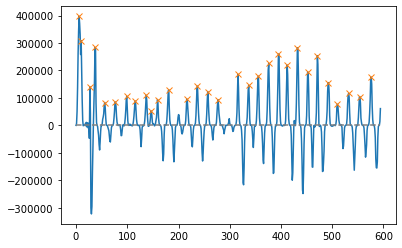

In [193]:
#Sit-ups, only looking at hand gyro
#Maybe it is possible to come up with some formula/threshold but first we need to know the true count

xyz = x * y * z
peaks, _ = find_peaks(xyz, height=50000)
print(len(peaks))
plt.plot(xyz)
plt.plot(peaks, xyz[peaks], "x")
plt.plot(np.zeros_like(xyz), "--", color="gray")
plt.show()

In [ ]:
#probably we will send data in 1 second intervals via mqtt
#for activity classification we can look at the last 5 second interval
#for counting maybe we can count peaks from when a new activity is classified until present time (???)


#for now there is no easy way to do counting since we don't know the true count
#maybe it is possible to improve activity classification model using calculus/signal processing to extract more features